In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


## Req 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
#### Use the OpenWeatherMap to retrieve weather data from the cities list generated in the starter code

In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [31]:
# test the code to see the json file structure
# response = requests.get(query_url + 'Cave Creek').json()
# sample_weather = response
# sample_weather


In [32]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | mogocha
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | nikolayevsk-on-amure
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | manacapuru
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | benoy
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1

In [33]:
# convert the cities' weather data into a PD dataframe and show the record count

city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [34]:
# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-20.43,100,57,1.80,RU,1698691020
1,margate,51.3813,1.3862,10.17,91,100,0.45,GB,1698691056
2,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698690936
3,isafjordur,66.0755,-23.1240,0.02,86,75,1.03,IS,1698690943
4,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698690938


In [35]:
# export the city_data into a csv file
city_data_df.to_csv("output_data/cities.csv", index_label='City_ID')

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# display the sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-20.43,100,57,1.80,RU,1698691020
1,margate,51.3813,1.3862,10.17,91,100,0.45,GB,1698691056
2,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698690936
3,isafjordur,66.0755,-23.1240,0.02,86,75,1.03,IS,1698690943
4,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698690938


### Create Scatter Plots

#### Latitude vs. Temp

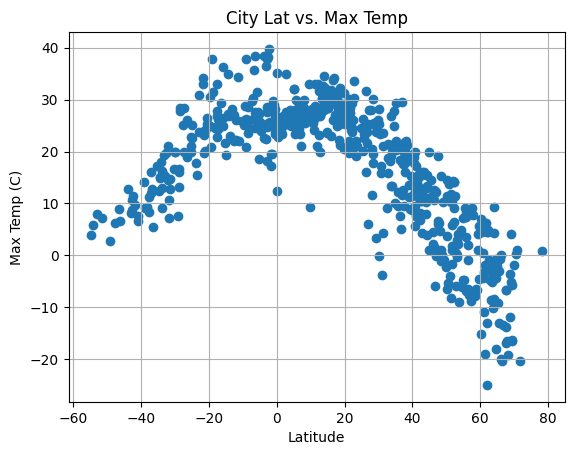

In [37]:
# build scatter plot for latitude vs. temp
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
plt.title("City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude vs. Humidity

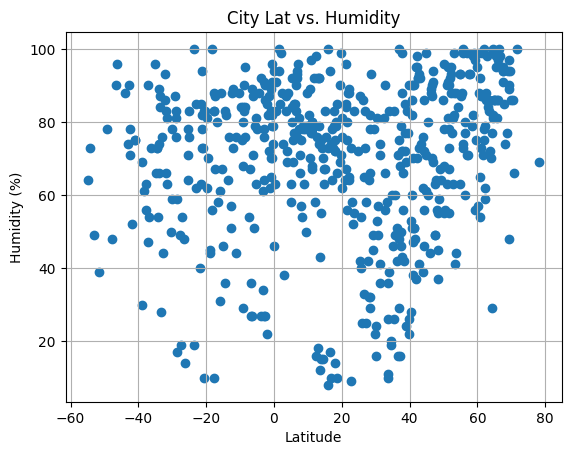

In [38]:
# build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
plt.title("City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig2.png")

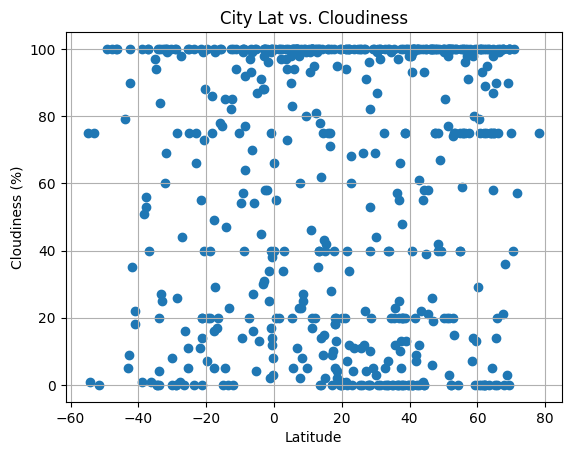

In [39]:
# build a scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
plt.title("City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig3.png")

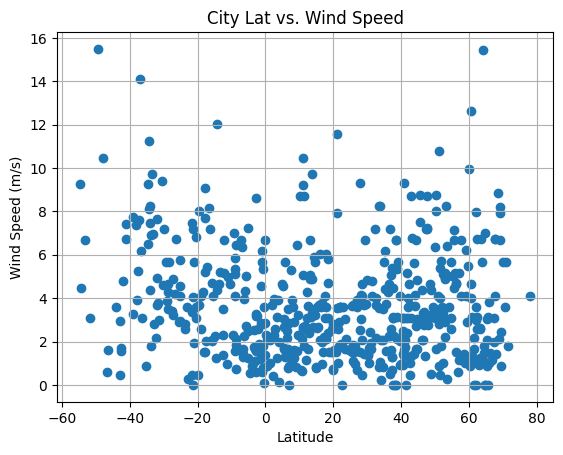

In [40]:
# build a scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
plt.title("City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# save the figure
plt.savefig("output_data/Fig4.png")

### Req 2: Computer Linear Regressions for Each Relationship

In [41]:
# define a function to create linear regression plots. store "lng" in the y-value so the code will run, for now. 
y_value = city_data_df["Lng"]
(slope, intercept, rvalue, pvalue, sderr) = linregress(city_data_df["Lat"], y_value)
regress_values = city_data_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [42]:
# create a dataframe with the northern hemisphere data (lat >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-20.43,100,57,1.80,RU,1698691020
1,margate,51.3813,1.3862,10.17,91,100,0.45,GB,1698691056
3,isafjordur,66.0755,-23.1240,0.02,86,75,1.03,IS,1698690943
5,mogocha,53.7333,119.7667,-8.96,44,100,0.25,RU,1698691227
7,nikolayevsk-on-amure,53.1406,140.7300,-0.03,88,15,2.23,RU,1698691228


In [43]:
# create a dataframe with the southern hemisphere data (lat <= 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,2.83,78,100,15.49,TF,1698690936
4,edinburgh of the seven seas,-37.0676,-12.3116,12.09,90,100,14.09,SH,1698690938
6,avarua,-21.2078,-159.7750,24.03,73,20,7.20,CK,1698691187
8,puerto natales,-51.7236,-72.4875,7.25,39,0,3.09,CL,1698690687
9,chonchi,-42.6128,-73.8092,10.62,71,90,1.57,CL,1698691035


#### Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8667523003027425


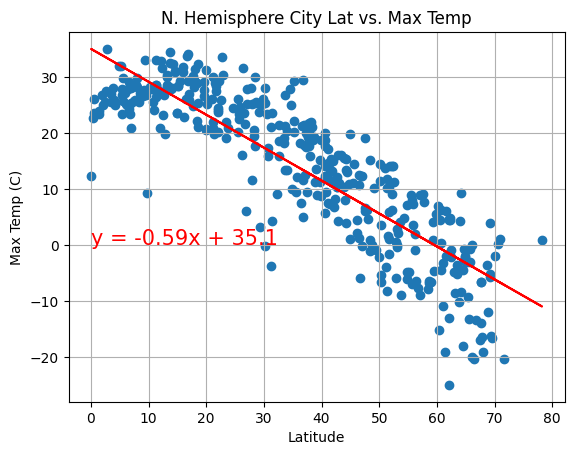

In [44]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_temp = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.title("N. Hemisphere City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(0, 0), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.7697891843888403


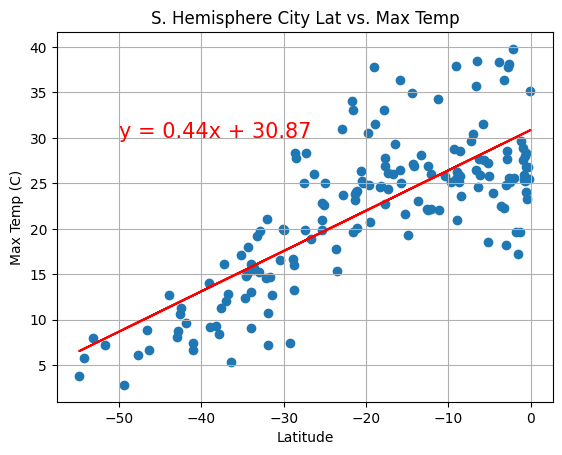

In [52]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_temp = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.title("S. Hemisphere City Lat vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 30), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

##### Analysis
When we plot the latitude vs. the temperature for a random sample of cities, you see a relatively strong correlation. As you move away from the equator, maximum temperatures will decrease regardless of which direction you move. This is consistent across both datasets even though there are more samples in the northern hemisphere. This is the strongest set of relationships in our analysis. 

### Humidity vs Latitude Linear Regression Plot

The r-value is: 0.160498822530279


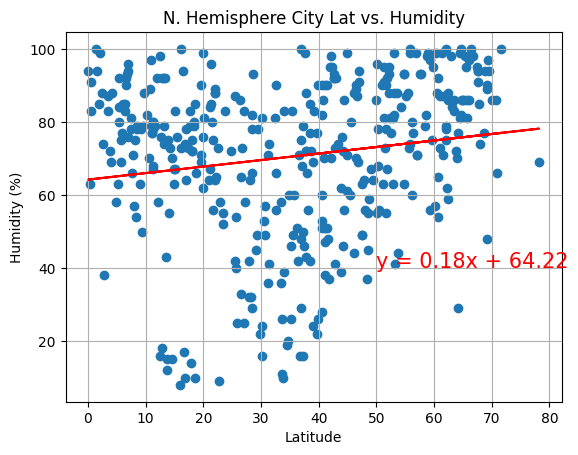

In [53]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_hum = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.title("N. Hemisphere City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.04416835057334719


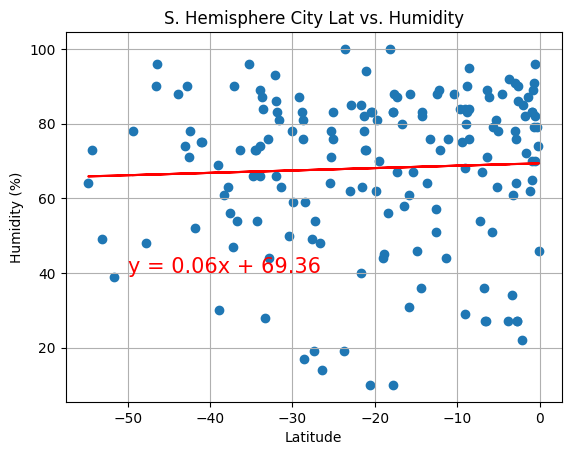

In [54]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_hum = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_hum)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.title("S. Hemisphere City Lat vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis
When we plot relative humidity against latitude, we observe almost no correlation between the data points. This makes sense because relative humidity is often (but not always) correlated to a city's proximity in relation to bodies of water, rather than latitude. There was a slightly stronger correlation in the northern hemisphere data, but not strong enough to draw a significant correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.160498822530279


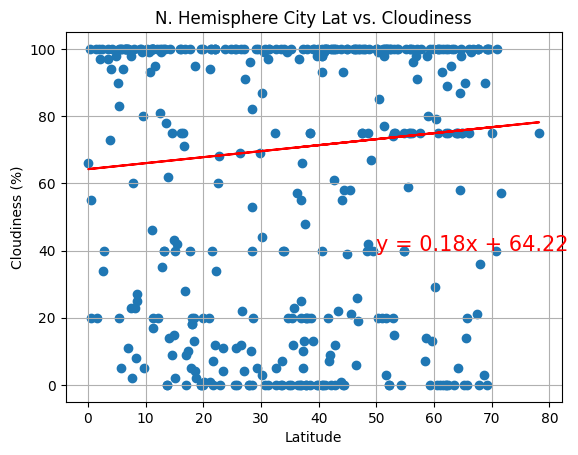

In [55]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_cloud = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.title("N. Hemisphere City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 40), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: 0.06855403727738175


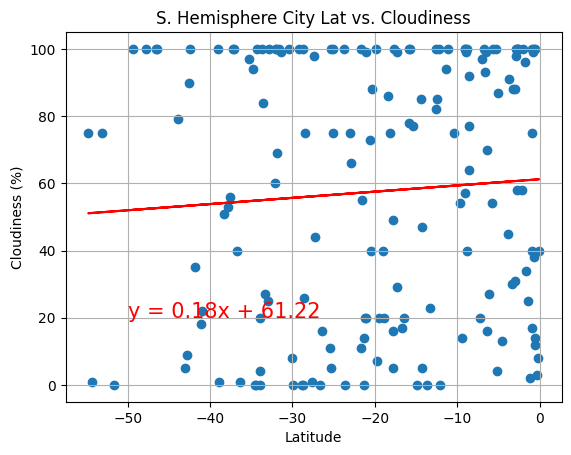

In [56]:
# plot the linear regression for the southern hemisphere

s_lat = southern_hemi_df['Lat']
s_cloud = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.title("S. Hemisphere City Lat vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 20), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis

The relationship between a city's latitide and its cloudiness is weak, according to the analysis. The relatively low r-values indicate that we don't observe a strong correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14440240382621755


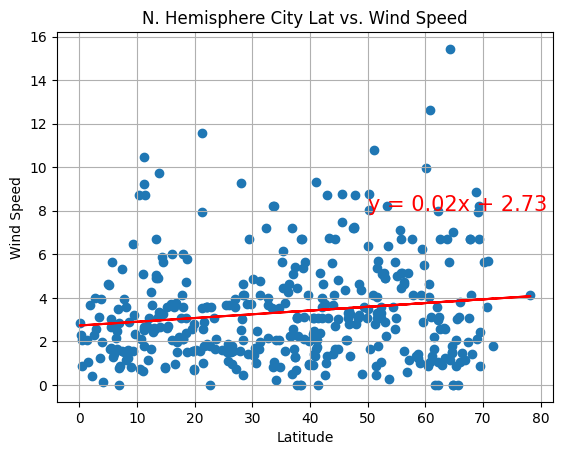

In [57]:
# plot the linear regression for the northern hemisphere
n_lat = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.title("N. Hemisphere City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(n_lat, regress_values, "r-")
plt.annotate(line_eq,(50, 8), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

The r-value is: -0.35959856093134324


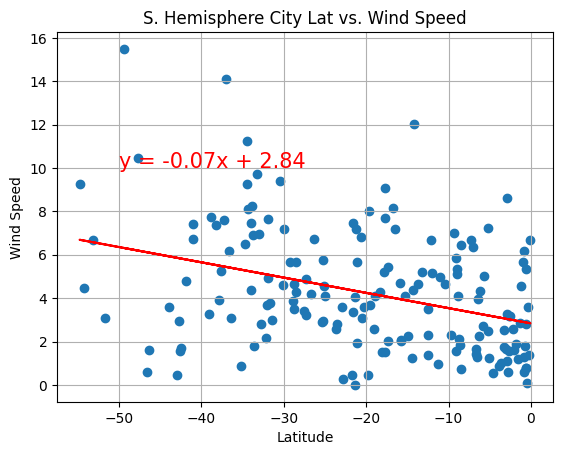

In [58]:
# plot the linear regression for the southern hemisphere
s_lat = southern_hemi_df['Lat']
s_wind = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, sderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.title("S. Hemisphere City Lat vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.plot(s_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 10), fontsize=15, color="red")

print(f'The r-value is: {rvalue}')

#### Analysis

There's virtually no correlation between wind speed and latitude, according to the data. 

### Conclusion

The only data sets that exhibited significant correlations were the relationship between latitude and maximum temperature. As you move away from the equator, the temperature is expected to decrease due to the angle of the sun over the course of a year. The other data sets indicate that weather patterns depend on other factors, besides latitude. 